# The Classification of Pulsar Stars - Project Report


### Introduction

Pulsar stars are a rare type of neutron star that produce detectable radio emissions. Pulsars rotate and emit beams of electromagnetic radiation, which can be detected if they align directly with Earth. 

These beams take the form of radio waves - electromagnetic waves oscillating at specific frequencies that can be detected.

Using scientific equipment, we can scan for radio waves and discover new pulsar stars. However, some positive detections are caused by radio frequency interference, which makes real detections difficult to find. The main objective of our data analysis is determining if scientific equipment analyzed a real pulsar star or radio frequency interference.<br/> 

<img src="https://media.giphy.com/media/l3dj5M4YLaFww31V6/giphy.gif" width = "600"/>

Source: https://media.giphy.com/media/l3dj5M4YLaFww31V6/giphy.gif

This leads into our question: 
__Using pulsar star candidate data recorded by scientific equipment, is a given candidate a true pulsar star or just radio frequency interference?__

Each observation in the data set (the <a href="https://archive.ics.uci.edu/ml/datasets/HTRU2">HTRU2 Data Set</a> by Rob Lyon) is a candidate, with 8 continuous variables:<br />
1. `mean_of_int_profiles` <br/>
2. `sd_of_int_profiles`<br />
3. `excess_kurtosis_of_int_profiles`<br />
4. `skewness_of_int_profiles`<br />
5. `mean_of_curve`<br />
6. `sd_of_curve`<br />
7. `excess_kurtosis_of_curve`<br />
8. `skewness_of_curve`<br />

... and one class variable:<br />
1. `true_pulsar`

The first four of our predictor variables are simple statistics obtained from the integrated pulse profile. Pulse profiles are beams radiated by pulsars which have unique signatures that differ from pulsar to pulsar. 

The remaining four predictor variables are similar statistics obtained from the DM-SNR curve.  DM-SNR stands for Dispersion Measure/Signal-to-Noise Ratio, which analyzes the signal to noise ratio of pulsar beams in a normalized curve. 


### Method and Results

Description of Methodology: 

We will use a classifier that utilizes the k nearest neighbor algorithm, which is a type of supervised learning method. The knn algorithmn uses proximity to make classifications or predictions about the grouping of a particular datapoint. Firstly, we will do a preliminary exploratory analysis to get an overview of the dataset. Since we have limited knowledge about the subject of study (pulsar star) while we also have a large amount of data and relatively small number of predictors, we will use the forward selection method to aid us in selecting relevant variables to use in our model. After that, we will cross-validation to determine the k values that would give us the best performance. We subsequently used this value to perform the classification and assess the accuracy of the our model (with a percentage as well as a confusion matrix).


In [2]:
# Importing required libraries

library(tidyverse)
library(repr)
library(tidymodels)
install.packages("themis")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──



✔ ggplot2 3.3.6     ✔ purrr   0.3.4

✔ tibble  3.1.7     ✔ dplyr   1.0.9

✔ tidyr   1.2.0     ✔ stringr 1.4.0

✔ readr   2.1.2     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──

✖ dplyr::filter() masks stats::filter()

✖ dplyr::lag()    masks stats::lag()



── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──



✔ broom        1.0.0     ✔ rsample      1.0.0

✔ dials        1.0.0     ✔ tune         1.0.0

✔ infer        1.0.2     ✔ workflows    1.0.0

✔ modeldata    1.0.0     ✔ workflowsets 1.0.0

✔ parsnip      1.0.0     ✔ yardstick    1.0.0

✔ recipes      1.0.1     



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──

✖ scales::discard() masks purrr::discard()

✖ dplyr::filter()   masks stats::filter()

✖ recipes::fixed()  masks stringr::fixed()

✖ dplyr::lag()      masks stats::lag()

✖ 

We can download the dataset (https://archive.ics.uci.edu/ml/datasets/HTRU2) and import it into JupyterHub.

In [3]:
# Downloading from url 
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
dir.create("data")
file <- download.file(url, "data/HTRU2.zip")

# Because the data we need is in a .zip file, we use the unzip() function in order to access "HTRU_2.csv"
star_data <- read_csv(unzip("data/HTRU2.zip", files = "HTRU_2.csv", exdir = "data/"), 
            col_names = c("mean_of_int_profiles", "sd_of_int_profiles", "excess_kurtosis_of_int_profiles",
            "skewness_of_int_profiles", "mean_of_curve", "sd_of_curve", 
            "excess_kurtosis_of_curve", "skewness_of_curve", "true_pulsar")) |>
    mutate(true_pulsar = as_factor(true_pulsar))

print("Table 1.0: Snapshot of star data")

slice(star_data, 1:10)
# Below is a snapshot of the star data we will be working with

Warning message in dir.create("data"):

“'data' already exists”

Rows: 17898 Columns: 9

── Column specification ────────────────────────────────────────────────────────

Delimiter: ","

dbl (9): mean_of_int_profiles, sd_of_int_profiles, excess_kurtosis_of_int_pr...



ℹ Use `spec()` to retrieve the full column specification for this data.

ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1.0: Snapshot of star data"


mean_of_int_profiles,sd_of_int_profiles,excess_kurtosis_of_int_profiles,skewness_of_int_profiles,mean_of_curve,sd_of_curve,excess_kurtosis_of_curve,skewness_of_curve,true_pulsar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.15832276,0.3895404,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.45268802,0.1703474,2.3319398,14.486853,9.001004,107.97251,0


#### Preliminary Exploratory Data Analysis

Before we begin classification, let's have an overview of our dataset. We will look at the number and percentage of pulsar and non-pulsar observations in our dataset.


In [4]:
# Summarizing data into table counting the number of true and false pulsars

num_obs <- nrow(star_data)

pulsar_frequency <- star_data |>
    group_by(true_pulsar) |>
    summarize(count = n(),
             percentage = n() / num_obs * 100)

print("Table 1.1: Showing the proportions of true and false pulsars")

pulsar_frequency

[1] "Table 1.1: Showing the proportions of true and false pulsars"


true_pulsar,count,percentage
<fct>,<int>,<dbl>
0,16259,90.842552
1,1639,9.157448


Here, we can see that there is a class imbalance - there are about 10 times more false pulsars than true pulsars! To solve this, we oversample the true pulsars in order to ensure that our classification is not skewed towards predicting false.

The first step is to split our data into a training and a testing set:

In [5]:
# DO NOT REMOVE
set.seed(9999) 

# Splitting data into training and testing, with true_pulsar as the strata
pulsar_split <- initial_split(star_data, prop = 0.75, strata = true_pulsar)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

We will first upsample our training data, and then take a closer look at it. For now, our intended predictor variables are going to be **mean_of_int_profiles** and **mean_of_curve**, but we will decide on our predictor variables later by using forward selection.

In [6]:
# Create upsampling recipe
ups_recipe <- recipe(true_pulsar ~ ., data = pulsar_train) |>
  themis::step_upsample(true_pulsar, over_ratio = 1, skip = FALSE) |>
  prep()

In [7]:
# Actually using recipe to create upsampled data set
pulsar_train_upsampled <- bake(ups_recipe, pulsar_train)

print("Table 1.2: Showing the proportions of true and false pulsars after upsampling (for training set)")

pulsar_train_upsampled |>
  group_by(true_pulsar) |>
  summarize(number = n())

[1] "Table 1.2: Showing the proportions of true and false pulsars after upsampling (for training set)"


true_pulsar,number
<fct>,<int>
0,12207
1,12207


As we can see now, the ratio of true and false pulsar observations is perfectly balanced. Now, we can explore our upsampled data further. Let's find the average values of all of the variables for our upsampled training set.

In [8]:
# Creating another table that shows the average of our intended predictor variables, and all the other variables.
pulsar_predictors <- pulsar_train_upsampled |>
    group_by(true_pulsar) |>
    summarize(avg_mean_of_int_profiles = mean(mean_of_int_profiles),
              avg_mean_of_curve = mean(mean_of_curve),
              sd_of_mean_of_int_profiles = sd(mean_of_int_profiles),
              sd_of_mean_of_curve = sd(mean_of_curve),
              max_mean_of_int_profiles = max(mean_of_int_profiles),
              max_mean_of_curve = max(mean_of_curve),
              min_mean_of_int_profiles = min(mean_of_int_profiles),
              min_mean_of_curve = min(mean_of_curve))

print("Table 1.3: Showing the average of our intended predictor variables")

pulsar_predictors

[1] "Table 1.3: Showing the average of our intended predictor variables"


true_pulsar,avg_mean_of_int_profiles,avg_mean_of_curve,sd_of_mean_of_int_profiles,sd_of_mean_of_curve,max_mean_of_int_profiles,max_mean_of_curve,min_mean_of_int_profiles,min_mean_of_curve
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,116.68182,8.886237,17.49323,24.42917,192.6172,223.3921,33.21094,0.2132107
1,56.41515,50.493516,29.88371,45.51590,139.2578,184.5259,5.81250,0.4866221


From this, we note that true pulsars have a mean of integrated profile around 57 and a mean of curve around 50, while false pulsars have a mean of integrated profile around 117 and a mean of curve around 9.

#### Preminary Visualization

We will now perform some visualization to get a sense of how the data looks. We will be graphing our training data (both original and upsampled) on a scatter plot, with our intended predictor variables on the x and y axes.

[1] "Figure 1.0: Scatter plot for original training data"

[1] "Figure 1.1: Scatter plot for upsampled training data"


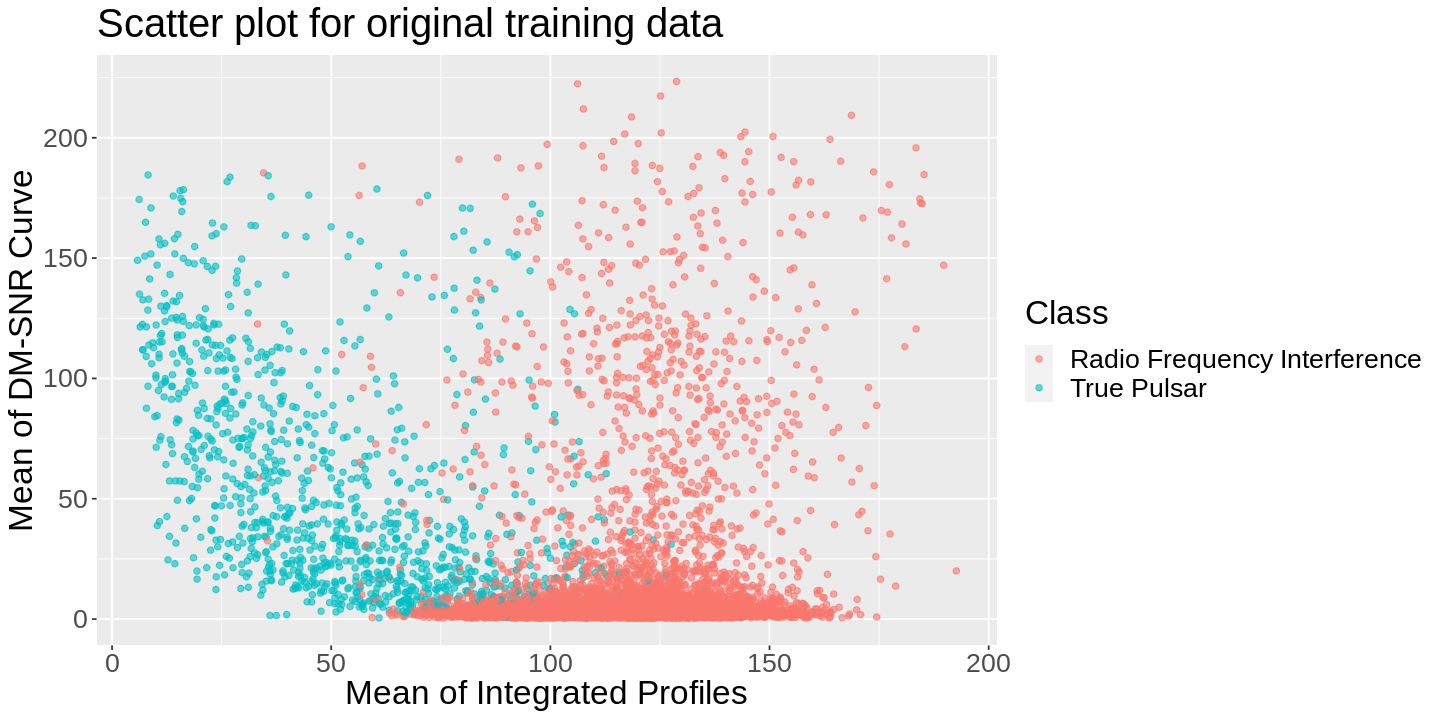

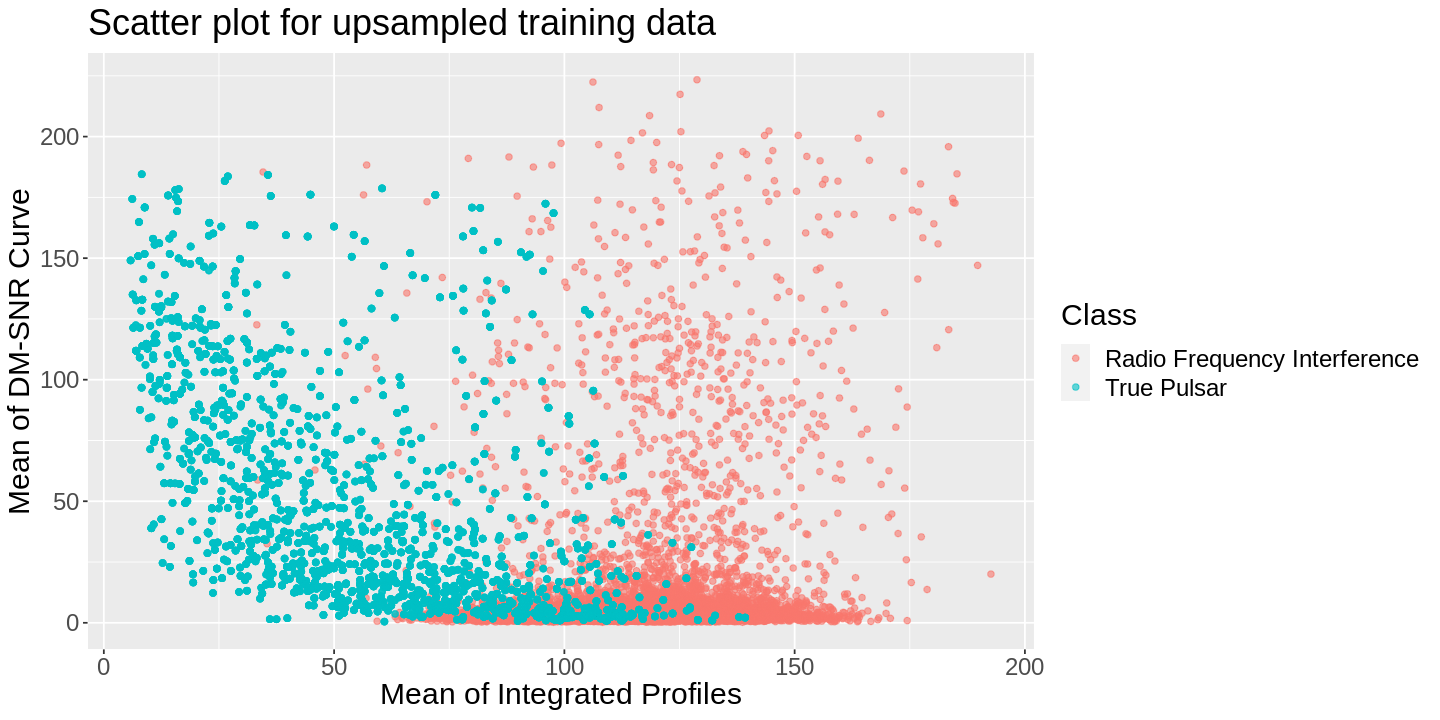

In [8]:
# Next, we will begin some visualization of our training data. We start by building scatter plots with Mean of Integrated Profiles on the x-axis 
# and Mean of DM-SNR Curve on the y-axis, with True Pulsars labeled by colour. We will build one with the original star data, and one with the 
# upsampled data.

# DO NOT REMOVE
set.seed(9999) 

# Visualizing the mean of integrated profiles and the mean of DM-SNR curve with colour to differentiate true pulsars
options(repr.plot.width = 12, repr.plot.height = 6)

pulsar_plot <- pulsar_train |>
    ggplot(aes(x = mean_of_int_profiles, y = mean_of_curve)) +
           geom_point(aes(color = true_pulsar), alpha = 0.6) +
           labs(x = "Mean of Integrated Profiles", y = "Mean of DM-SNR Curve", color = "Class") +
           scale_color_discrete(labels=c('Radio Frequency Interference', 'True Pulsar')) + 
           theme(text = element_text(size = 20)) +
           ggtitle("Scatter plot for original training data")

print("Figure 1.0: Scatter plot for original training data")

pulsar_plot

pulsar_plot_upsampled <- pulsar_train_upsampled |>
    ggplot(aes(x = mean_of_int_profiles, y = mean_of_curve)) +
           geom_point(aes(color = true_pulsar), alpha = 0.6) +
           labs(x = "Mean of Integrated Profiles", y = "Mean of DM-SNR Curve", color = "Class") +
           scale_color_discrete(labels=c('Radio Frequency Interference', 'True Pulsar')) + 
           theme(text = element_text(size = 18)) +
           ggtitle("Scatter plot for upsampled training data")

print("Figure 1.1: Scatter plot for upsampled training data")

pulsar_plot_upsampled

Although the plots appear similar, we can see that for the upsampled plot, True Pulsars are more prominent near the bottom instead of being overshadowed by radio frequency interference. Additionally, another point we can derive from this visualization is that "true pulsar" usually have lower mean of integrated profiles while they have the same range in mean of DM-SNR Curve compared to "non-pulsar". This could imply that mean of integrated profiles is a potential predictor that can be used in our upcoming model. 

#### Predictor variable selection

For our project we will use forward selection to select predictor variables to be used in the model. We start with an empty model and iteratively add variables that give the best performance to the model.


In [9]:
names <- colnames(pulsar_train_upsampled |> select(-true_pulsar))

formula <- paste("true_pulsar", "~", paste(names, collapse="+"))
formula

[1] "true_pulsar ~ mean_of_int_profiles+sd_of_int_profiles+excess_kurtosis_of_int_profiles+skewness_of_int_profiles+mean_of_curve+sd_of_curve+excess_kurtosis_of_curve+skewness_of_curve"

In [10]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
star_vfold <- vfold_cv(pulsar_train_upsampled, v = 5, strata = true_pulsar)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for (i in 1:n_total) {
#     accs <- list()
#     models <- list()
#     for (j in 1:length(names)) {
#         preds_new <- c(selected, names[[j]])
#         model_string <- paste("true_pulsar", "~", paste(preds_new, collapse="+"))
#
#         star_recipe <- recipe(as.formula(model_string), 
#                                 data = pulsar_train_upsampled) |>
#                           step_scale(all_predictors()) |>
#                           step_center(all_predictors())
#
#         acc <- workflow() |>
#           add_recipe(star_recipe) |>
#           add_model(knn_spec) |>
#           tune_grid(resamples = star_vfold, grid = 10) |>
#           collect_metrics() |>
#           filter(.metric == "accuracy") |>
#           summarize(mx = max(mean))
#         acc <- acc$mx |> unlist()
#
#         accs[[j]] <- acc
#         models[[j]] <- model_string
#     }
#     jstar <- which.max(unlist(accs))
#     accuracies <- accuracies |> 
#       add_row(size = i, 
#               model_string = models[[jstar]], 
#               accuracy = accs[[jstar]])
#     selected <- c(selected, names[[jstar]])
#     names <- names[-jstar]
# }
#
# accuracies



In [11]:
print("Table 2.0: Predictor variables combinations and corresponding accuracies")

[1] "Table 2.0: Predictor variables combinations and corresponding accuracies"



<img src="data/dsci_project.png" width = "1100"/>

In order to save time, we have attached  an image of the result of forward selection and commented out the code. From what we obtained , we can see that using the three variables excess_kurtosis_of_int_profiles, mean_of_int_profiles and skewness_of_int_profiles  in our model would give the best performance. Therefore we will use these variables as predictors. 

#### Tuning the Model

We begin by creating a 5-fold cross validation to find the optimal *k* value:

In [12]:
pulsar_vfold <- vfold_cv(pulsar_train_upsampled, v = 5, strata = true_pulsar)

In [13]:
# Creating a model and recipe for our tuning classification:
pulsar_recipe <- recipe(true_pulsar ~ excess_kurtosis_of_int_profiles + mean_of_int_profiles + skewness_of_int_profiles , data = pulsar_train_upsampled) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) 

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |> 
    set_mode("classification") 

In [14]:
# creating intervals of k values to test
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# Combining everything into a workflow
knn_results <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = pulsar_vfold, grid = k_vals) |>
  collect_metrics()

print("Table 2.1: Cross validation accuracy results")

knn_results

[1] "Table 2.1: Cross validation accuracy results"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9900877,5,0.0006687330,Preprocessor1_Model01
1,roc_auc,binary,0.9900877,5,0.0006687330,Preprocessor1_Model01
2,accuracy,binary,0.9900877,5,0.0006687330,Preprocessor1_Model02
2,roc_auc,binary,0.9900818,5,0.0006692243,Preprocessor1_Model02
3,accuracy,binary,0.9814043,5,0.0010035234,Preprocessor1_Model03
3,roc_auc,binary,0.9901855,5,0.0007061920,Preprocessor1_Model03
4,accuracy,binary,0.9814043,5,0.0010035234,Preprocessor1_Model04
4,roc_auc,binary,0.9903414,5,0.0006091670,Preprocessor1_Model04
5,accuracy,binary,0.9747687,5,0.0009911073,Preprocessor1_Model05


Now, we will analyze and plot the accuracies for these k values in order to choose the best k.

[1] "Figure 2.0: Line plot for accuracy estimates at various k values"


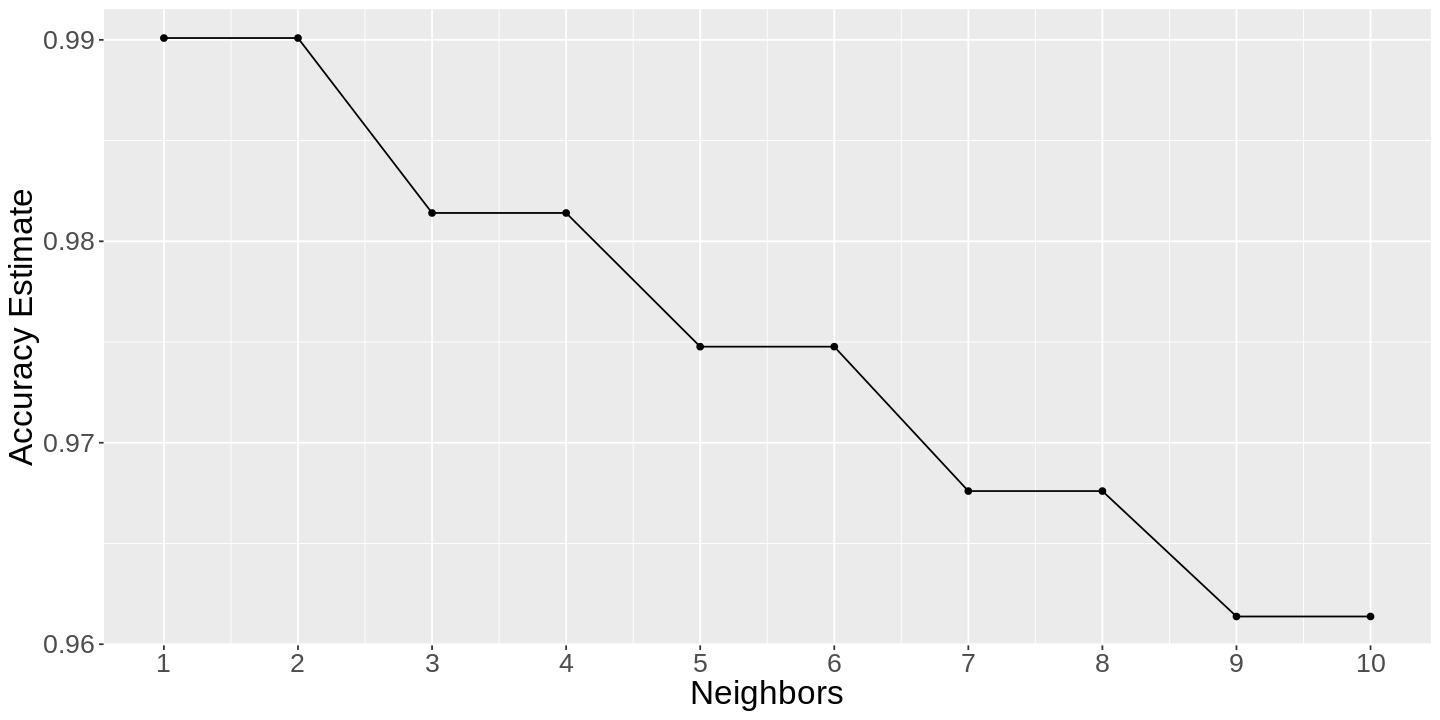

In [15]:
# Now, we will be analyzing the accuracies at different k values.
accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       theme(text = element_text(size = 20)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1))   # adjusting the x-axis

print("Figure 2.0: Line plot for accuracy estimates at various k values")

accuracy_versus_k

From this graph, we see that having a k value of 1 and 2 results in the highest accuracy estimate. However, we feel that using 1 as our k value is too extreme and may produce problems in our tests, such as overfitting. For these reasons, we will use a k value of 2 for our classification model.

#### Performing the classification

Now, we will finally create our knn classification model with our carefully chosen predictor variables and k value.

In [16]:
pulsar_training_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |> 
    set_engine("kknn") |> 
    set_mode("classification") # training model with k = 2 neighbors (found through 5-fold cross validation)

pulsar_fit <- workflow() |>
    add_recipe(pulsar_recipe) |>
    add_model(pulsar_training_model) |>
    fit(data = pulsar_train_upsampled)

With this classification model set up, we can now test it against our testing data.

In [17]:
pulsar_test_predictions <- predict(pulsar_fit, pulsar_test) |> 
    bind_cols(pulsar_test) # prediction set

pulsar_prediction_accuracy <- pulsar_test_predictions |>
    metrics(truth = true_pulsar, estimate = .pred_class) # accuracy of predictions

print("Table 2.2: The accuracy of our classification on testing data")

pulsar_prediction_accuracy

[1] "Table 2.2: The accuracy of our classification on testing data"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9660335
kap,binary,0.7968433


In [18]:
pulsar_mat <- pulsar_test_predictions |>
    conf_mat(truth = true_pulsar, estimate = .pred_class)

print("Table 2.3: A confusion matrix for true and false pulsar predictions")

pulsar_mat # confusion matrix which helps us find that 4,293 of our 4,475 observations were labelled correctly 

[1] "Table 2.3: A confusion matrix for true and false pulsar predictions"


          Truth
Prediction    0    1
         0 3987   87
         1   65  336

### Discussion

__What did we find?__
We found that by using excess_kurtosis_of_int_profiles, mean_of_int_profiles and skewness_of_int_profiles, we can accurately predict whether a reading is a pulsar or just interference 96.6% of the time (4323/4475).  This is a very accurate classifier which we believe can be very helpful in saving time for scientists.  Using this classification model, scientists would not need to confirm if every reading is a real pulsar and could rather use the model to confirm readings.

__Is this what we expected to find?__
Yes and No.  We expected that we would find a model that would predict the occurrence of a pulsar well but we never expected it to predict it with the accuracy we achieved.  Looking at the article by Stephen Allwright, a data scientist at ODA, an acceptable level of accuracy within most industries is 70 to 90% (Allright, 2022). This is around where we thought our model would be. The 95.9% accuracy we achieved was far superior to the 90% standard, which was a pleasant surprise.

There are several possible reasons why our accuracy was so high. The first one is that we followed all necessary procedures in order to optimize our classification model's accuracy. For example, we recognized the need for upsampling of data, and we utilized forward selection to mathematically choose the best possible combination of prediction variables. However, another reason for this high accuracy could be due to the nature of our data. The star dataset we have been working with is quite large, and so this reduces the impact that unlucky data points have on our accuracy. We can also infer that there is some kind of structure/pattern to our data points based on class, which is what allows our classifier to predict so accurately.

__What are the impacts of this finding?__
As outlined in the academic thesis paper "why are pulsars hard to find?", the most difficult part of identifying a pulsar is sifting through the enormous amount of data that is collected by scientific equipment (Robert James, 2016). Robert Lyon from the school of computer science at Manchester University likens finding true pulsar readings to finding a needle in a haystack.  Therefore, With the ability to confidently classify whether a star is a pulsar or not, scientists could make enormous strides in astronomy. By weeding out the fake pulsars and focusing only on the real ones efficiently with a model, scientists can more accurately study what is happening inside real pulsars while saving time. Since neutron stars (which pulsars are) are the densest material in the universe, studying them can lead to enormous discoveries related to the physics of the universe. Also, by weeding out the fake pulsars, scientists can focus on the real pulsars and calculate cosmic distances.  This is because pulsar stars blink at regular intervals rivalled only by atomic clocks (Calla, 2016).  Overall, the ability to accurately predict whether a "pulsar event" in data is real or just interference is a major step in studying the universe beyond our own planet.

__What future questions are there?__
One big question is if we can use a regression model in order to predict certain variables for pulsar stars. Classification allows us to analyze if a reading is a pulsar star or not, but with regression, we may be able to predict more about the characteristics of these pulsars.

Also, we must question if there are more accurate predictor variables that would work better that have not yet been measured. This also brings up, can we tune equipment in the field to also track in real-time whether a reading is real or just interference and filter it right away so scientists don't need to study it?

Given that this is just a predictive algorithm to determine if it is pulsar or interference, we must question the validity of the data and if the scientists behind it accurately classified the pulsars.

### References

Lyon, Robert James. “HTRU2 Data Set.” UCI Machine Learning Repository, HTRU2 Data Set, https://archive.ics.uci.edu/ml/datasets/HTRU2. 

Cofield, Calla. “What Are Pulsars?” Space.com, Space, 22 Apr. 2016, https://www.space.com/32661-pulsars.html. 

Stephen Allwright. “What Is a Good Accuracy Score? Simply Explained.” Stephen Allwright, Stephen Allwright, 10 Aug. 2022, https://stephenallwright.com/good-accuracy-score/. 

Lyon, Robert James. “Why Are Pulsars Hard to Find? - University of Manchester.” WHY ARE PULSARS HARD TO FIND?, 2022, https://www.research.manchester.ac.uk/portal/files/54588348/FULL_TEXT.PDF. 
